Startups in India - Data analysis and 7 prombelm statements

In this project we are provided the dataset of startups in India and have to answer 7 challenging problem statements. We will be python libraries for this analysis:-
  
 Pandas- For Data Wrangling & Modeling, 
 Numpy - For Calculations & Data Modeling, 
 Matplotlib - For Data Visualisation, 
 
I have completed this Project under the guidance of Mr.Prabhjot Singh, Trainer at Edubridge.

In [3]:
import pandas as pd
import numpy as np

In [4]:
## Import the data

data = pd.read_csv('startup_funding - Copy.csv')
#pd.set_option('display.max_rows', None)
data

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [5]:
data.shape

(2372, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


The flwas in the dataset are :- 

a.Various emplty values in industry vertical, subvertical, city location,investor name,  1 in investment type, amount USD, remarks
b.Date format is not same for all values in date columns
c. City location US and USA needs to corrected
d.Text case is not same in columns industry vertical and sub vertical
e. S.no starts from 0
f. Spelling errors in startup names.

First we will correct data type and the date format of values in data column. Solving the errors step wise step

In [7]:
data.loc[data['Date']=='22/01//2015','Date']= '22/01/2015'

In [8]:
data['Date']=pd.to_datetime(data['Date']) ## converted data type to datetime type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SNo               2372 non-null   int64         
 1   Date              2372 non-null   datetime64[ns]
 2   StartupName       2372 non-null   object        
 3   IndustryVertical  2201 non-null   object        
 4   SubVertical       1436 non-null   object        
 5   CityLocation      2193 non-null   object        
 6   InvestorsName     2364 non-null   object        
 7   InvestmentType    2371 non-null   object        
 8   AmountInUSD       1525 non-null   object        
 9   Remarks           419 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 185.4+ KB


In [9]:
data['Date2'] = data['Date'].dt.strftime('%m-%d-%Y') ## created new column with same the date format for all values
data = data[['SNo','Date','Date2','StartupName','IndustryVertical','SubVertical','CityLocation','InvestorsName','InvestmentType','AmountInUSD','Remarks']] ## rearranged the columns
data

,SNo,Date,Date2,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,2017-01-08,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,2017-02-08,02-08-2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,2017-02-08,02-08-2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,2017-02-08,02-08-2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,2017-02-08,02-08-2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...,...
2367,2367,2015-01-29,01-29-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,2015-01-29,01-29-2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,2015-01-30,01-30-2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,2015-01-30,01-30-2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


Now  we will correct case in all object data column to sentence case and title case to investor names.

In [10]:
#data['StartupName','IndustryVertical','SubVertical','CityLocation','InvestorsName','InvestmentType','Remarks'].str.lower()
data['StartupName']= data['StartupName'].str.capitalize()
data['IndustryVertical']= data['IndustryVertical'].str.capitalize()
data['SubVertical']= data['SubVertical'].str.capitalize()
data['CityLocation']= data['CityLocation'].str.capitalize()
data['InvestorsName']= data['InvestorsName'].str.title()
data['InvestmentType']= data['InvestmentType'].str.capitalize()
data['Remarks']= data['Remarks'].str.capitalize()

data

,SNo,Date,Date2,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,2017-01-08,01-08-2017,Touchkin,Technology,Predictive care platform,Bangalore,Kae Capital,Private equity,"1,300,000",NaN
1,1,2017-02-08,02-08-2017,Ethinos,Technology,Digital marketing agency,Mumbai,Triton Investment Advisors,Private equity,NaN,NaN
2,2,2017-02-08,02-08-2017,Leverage edu,Consumer internet,Online platform for higher education services,New delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed funding,NaN,NaN
3,3,2017-02-08,02-08-2017,Zepo,Consumer internet,Diy ecommerce platform,Mumbai,"Kunal Shah, Letsventure, Anupam Mittal, Hetal ...",Seed funding,"500,000",NaN
4,4,2017-02-08,02-08-2017,Click2clinic,Consumer internet,Healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...,...
2367,2367,2015-01-29,01-29-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private equity,"4,500,000",NaN
2368,2368,2015-01-29,01-29-2015,Graphene,NaN,NaN,NaN,Karsemven Fund,Private equity,"825,000",Govt backed vc fund
2369,2369,2015-01-30,01-30-2015,Mad street den,NaN,NaN,NaN,"Exfinity Fund, Growx Ventures.",Private equity,"1,500,000",NaN
2370,2370,2015-01-30,01-30-2015,Simplotel,NaN,NaN,NaN,Makemytrip,Private equity,NaN,"Strategic funding, minority stake"


Now we will correct the USA and US spell issue in city location.

In [12]:
data.loc[data['CityLocation']=='Us','CityLocation']= 'Usa'
data

,SNo,Date,Date2,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,2017-01-08,01-08-2017,Touchkin,Technology,Predictive care platform,Bangalore,Kae Capital,Private equity,"1,300,000",NaN
1,1,2017-02-08,02-08-2017,Ethinos,Technology,Digital marketing agency,Mumbai,Triton Investment Advisors,Private equity,NaN,NaN
2,2,2017-02-08,02-08-2017,Leverage edu,Consumer internet,Online platform for higher education services,New delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed funding,NaN,NaN
3,3,2017-02-08,02-08-2017,Zepo,Consumer internet,Diy ecommerce platform,Mumbai,"Kunal Shah, Letsventure, Anupam Mittal, Hetal ...",Seed funding,"500,000",NaN
4,4,2017-02-08,02-08-2017,Click2clinic,Consumer internet,Healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...,...
2367,2367,2015-01-29,01-29-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private equity,"4,500,000",NaN
2368,2368,2015-01-29,01-29-2015,Graphene,NaN,NaN,NaN,Karsemven Fund,Private equity,"825,000",Govt backed vc fund
2369,2369,2015-01-30,01-30-2015,Mad street den,NaN,NaN,NaN,"Exfinity Fund, Growx Ventures.",Private equity,"1,500,000",NaN
2370,2370,2015-01-30,01-30-2015,Simplotel,NaN,NaN,NaN,Makemytrip,Private equity,NaN,"Strategic funding, minority stake"


Now we will corret the SNo, so that it will start from 1, not 0

In [13]:
data['SNo'] = np.arange(1,2373)
data

,SNo,Date,Date2,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,2017-01-08,01-08-2017,Touchkin,Technology,Predictive care platform,Bangalore,Kae Capital,Private equity,"1,300,000",NaN
1,2,2017-02-08,02-08-2017,Ethinos,Technology,Digital marketing agency,Mumbai,Triton Investment Advisors,Private equity,NaN,NaN
2,3,2017-02-08,02-08-2017,Leverage edu,Consumer internet,Online platform for higher education services,New delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed funding,NaN,NaN
3,4,2017-02-08,02-08-2017,Zepo,Consumer internet,Diy ecommerce platform,Mumbai,"Kunal Shah, Letsventure, Anupam Mittal, Hetal ...",Seed funding,"500,000",NaN
4,5,2017-02-08,02-08-2017,Click2clinic,Consumer internet,Healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...,...
2367,2368,2015-01-29,01-29-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private equity,"4,500,000",NaN
2368,2369,2015-01-29,01-29-2015,Graphene,NaN,NaN,NaN,Karsemven Fund,Private equity,"825,000",Govt backed vc fund
2369,2370,2015-01-30,01-30-2015,Mad street den,NaN,NaN,NaN,"Exfinity Fund, Growx Ventures.",Private equity,"1,500,000",NaN
2370,2371,2015-01-30,01-30-2015,Simplotel,NaN,NaN,NaN,Makemytrip,Private equity,NaN,"Strategic funding, minority stake"


We need to deal with empty values. As the dataset is very limited so will not drop any row from dataset, we will fill the empty cells in object data type columns with "Not Defined" and integer data type column AmountInUSD with 0 

In [14]:
data['IndustryVertical'] = data['IndustryVertical'].fillna('Not Defined')
data['SubVertical'] = data['SubVertical'].fillna('Not Defined')
data['InvestorsName'] = data['InvestorsName'].fillna('Not Defined')
data['CityLocation'] = data['CityLocation'].fillna('Not Defined')
data['InvestmentType'] = data['InvestmentType'].fillna('Not Defined')
data['Remarks'] = data['Remarks'].fillna('Not Defined')
data['AmountInUSD'] = data['AmountInUSD'].str.replace(',', '')
data['AmountInUSD'] = data['AmountInUSD'].str.replace('nan', '0')
data['AmountInUSD'] = data['AmountInUSD'].str.replace('NaN', '0')
data['AmountInUSD'] = data['AmountInUSD'].fillna(0)
data['AmountInUSD'] = data['AmountInUSD'].astype(str).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SNo               2372 non-null   int64         
 1   Date              2372 non-null   datetime64[ns]
 2   Date2             2372 non-null   object        
 3   StartupName       2372 non-null   object        
 4   IndustryVertical  2372 non-null   object        
 5   SubVertical       2372 non-null   object        
 6   CityLocation      2372 non-null   object        
 7   InvestorsName     2372 non-null   object        
 8   InvestmentType    2372 non-null   object        
 9   AmountInUSD       2372 non-null   int64         
 10  Remarks           2372 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 204.0+ KB


In [90]:
data

,SNo,Date,Date2,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,2017-01-08,01-08-2017,Touchkin,Technology,Predictive care platform,Bangalore,Kae Capital,Private equity,1300000,Not Defined
1,2,2017-02-08,02-08-2017,Ethinos,Technology,Digital marketing agency,Mumbai,Triton Investment Advisors,Private equity,0,Not Defined
2,3,2017-02-08,02-08-2017,Leverage edu,Consumer internet,Online platform for higher education services,New delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed funding,0,Not Defined
3,4,2017-02-08,02-08-2017,Zepo,Consumer internet,Diy ecommerce platform,Mumbai,"Kunal Shah, Letsventure, Anupam Mittal, Hetal ...",Seed funding,500000,Not Defined
4,5,2017-02-08,02-08-2017,Click2clinic,Consumer internet,Healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed funding,850000,Not Defined
...,...,...,...,...,...,...,...,...,...,...,...
2367,2368,2015-01-29,01-29-2015,Printvenue,Not Defined,Not Defined,Not Defined,Asia Pacific Internet Group,Private equity,4500000,Not Defined
2368,2369,2015-01-29,01-29-2015,Graphene,Not Defined,Not Defined,Not Defined,Karsemven Fund,Private equity,825000,Govt backed vc fund
2369,2370,2015-01-30,01-30-2015,Mad street den,Not Defined,Not Defined,Not Defined,"Exfinity Fund, Growx Ventures.",Private equity,1500000,Not Defined
2370,2371,2015-01-30,01-30-2015,Simplotel,Not Defined,Not Defined,Not Defined,Makemytrip,Private equity,0,"Strategic funding, minority stake"


Now our data is ready to solve problem statements.

To undertand the codes better, i will suggest you to run it line by line and observe the changes in output.

Problem 1
Problem Statement :
Check the trend of investments over the years. To check the trend, find -
Total number of fundings done in each year.
Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
Print year-wise total number of fundings also. Print years in ascending order.
Note :
There is some error in the 'Date' feature. Make sure to handle that.

In [19]:
data_sep = data.Date2.str.split('-',expand = True)
data_sep.columns = ['Month','Day','Year']
data_sep

,Month,Day,Year
0,01,08,2017
1,02,08,2017
2,02,08,2017
3,02,08,2017
4,02,08,2017
...,...,...,...
2367,01,29,2015
2368,01,29,2015
2369,01,30,2015
2370,01,30,2015


In [92]:
pb1 = data_sep['Year'].value_counts() 
pb1 = pb1.sort_index()
pb1

2015    936
2016    993
2017    443
Name: Year, dtype: int64

In [93]:
Year = pb1.index
fund = pb1.values

Y1 = []
fd = []
for i,a in zip(Year,fund):
    i = str(i)
    a = int(a)
    Y1.append(i)
    fd.append(a)

print(Y1, fd)

['2015', '2016', '2017'] [936, 993, 443]


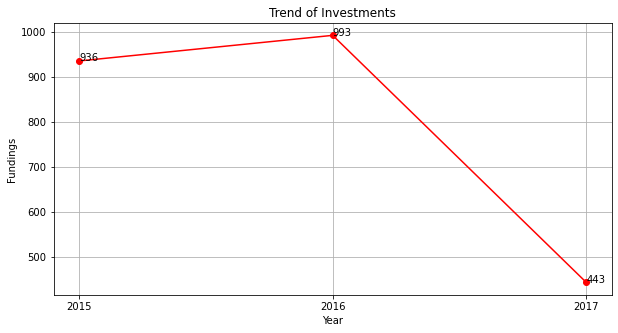

Year    Total number of Investments
2015    936
2016    993
2017    443
Name: Year, dtype: int64


In [94]:
import matplotlib.pyplot as plt

plt.plot(Y1,fd, c='r', marker='o')
plt.grid()
plt.title("Trend of Investments")
plt.xlabel("Year")
plt.ylabel("Fundings")
i = 0
while i <=2:
    plt.text(Y1[i],fd[i],s=fd[i])
    i+=1
plt.show()
print('Year','   Total number of Investments')
print(pb1)

Problem Statement2 :
Find out which cities are generally chosen for starting a startup.
Find top 10 Indian cities which have most number of startups ?
Plot a pie chart and visualise it.
Print the city name and number of startups in that city also.
Note :
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
Print the city in descending order with respect to the number of startups.
Output Format :
city1 number1
city2 number2

In [62]:
## we will be print 11 results as 1 result will be not defined cities.

data.loc[data['CityLocation'] == 'Delhi','CityLocation'] = 'New delhi'
city_data1 = data.CityLocation.str.split('/',expand = True)
city_data3 = city_data1[0].value_counts()
city_data1 = city_data3.head(11)
city_data1

Bangalore      630
Mumbai         446
New delhi      386
Gurgaon        240
Not Defined    179
Pune            85
Noida           78
Hyderabad       77
Chennai         67
Ahmedabad       35
Jaipur          25
Name: 0, dtype: int64

Here, there are two condition -1 we consider 'Not Defined' 2- we donot consider not defined

so we will plot graph for both

In [63]:
city_data2 = city_data3
city_data2.drop('Not Defined', axis=0, inplace = True)

In [65]:
city_data2 = city_data2.head(11)

In [66]:
city1 = city_data1.index

num1 = city_data1.values

city2 = city_data2.index

num2 = city_data2.values


c1 = []
n1 = []
for i,a in zip(city1,num1):
    a = int(a)
    c1.append(i)
    n1.append(a)

c2 = []
n2 = []
for i,a in zip(city2,num2):
    a = int(a)
    c2.append(i)
    n2.append(a)


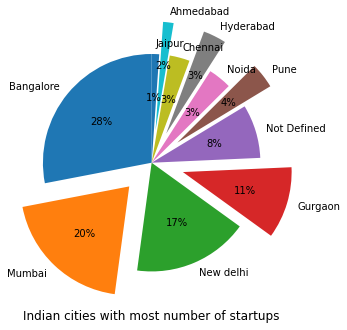

City           Number of Investments
Bangalore      630
Mumbai         446
New delhi      386
Gurgaon        240
Not Defined    179
Pune            85
Noida           78
Hyderabad       77
Chennai         67
Ahmedabad       35
Jaipur          25
Name: 0, dtype: int64


In [99]:
plt.pie(n1, labels = c1, startangle=90,explode = [0,0.3,0,0.3,0,0.3,0,0.3,0,0.3,0],counterclock = True, wedgeprops = {'linewidth':6},autopct="%0.0f%%")##use %% aftr f in autopct to converts values in percentage
plt.rcParams['figure.figsize']=(10,5) ## change the size opf graph
plt.title("Indian cities with most number of startups",y=-0.1)
plt.show()
print('City','          Number of Investments')
print(city_data1)

Problem Statement 3 :
Find out if cities play any role in receiving funding.
Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
Print the city and percentage with 2 decimal place after rounding off.
Note:
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
Print the city in descending order with respect to the percentage of funding.
Output Format :
city1 percent1
city2 percent2
city3 percent3

In [29]:
## The question has asked for 10 cities, so we will print 11 outputs, 10 cities, 1 not defined cities

data['AmountInUSD'].sum()

18347386476

In [60]:
df = data['AmountInUSD']
dm = data.CityLocation.str.split('/',expand=True)
dm = dm[0].astype(str)
dm = dm.str.strip()
maindata = pd.DataFrame().assign( Cities = dm, Amount =data['AmountInUSD'].astype(str).astype(int))
maindata.loc[maindata['Cities']== 'Us','Cities']= 'Usa'
maindata.loc[maindata['Cities']== 'Gurgaon','Cities']= 'Gurgaon'
maindata = maindata.groupby('Cities')['Amount'].sum()
maindata = maindata.sort_values(ascending = False).head(11)
maindata

Cities
Bangalore      8422974108
New delhi      2818247500
Mumbai         2354934500
Gurgaon        2069021500
Not Defined    1271863868
Chennai         411105000
Pune            366653000
Hyderabad       195362000
Noida           170638000
Ahmedabad        98186000
Jaipur           35560000
Name: Amount, dtype: int64

In [61]:
City = maindata.index
pamount = maindata.values
for i in range(len(City)):
    print(City[i],str(format(pamount[i]*100/25626469310,'.2f')+"%"))

Bangalore 32.87%
New delhi 11.00%
Mumbai 9.19%
Gurgaon 8.07%
Not Defined 4.96%
Chennai 1.60%
Pune 1.43%
Hyderabad 0.76%
Noida 0.67%
Ahmedabad 0.38%
Jaipur 0.14%


Problem Statement 4 :
There are 4 different type of investments. Find out percentage of amount funded for each investment type.
Plot a pie chart to visualise.
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.
Note :
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
Print the investment type in descending order with respect to the percentage of the amount funded.
Output Format :
investmentType1 percent1
investmentType2 percent2
investmentType3 percent3

In [36]:
type_data = data['InvestmentType'].value_counts()
type_data

Seed funding      1301
Private equity    1067
Crowd funding        2
Debt funding         1
Not Defined          1
Name: InvestmentType, dtype: int64

First we will need to correct the spellings

In [37]:
data['InvestmentType'] = data['InvestmentType'].str.replace('Seedfunding', 'Seed funding')
data['InvestmentType'] = data['InvestmentType'].str.replace('Privateequity', 'Private equity')

In [38]:
type_data

Seed funding      1301
Private equity    1067
Crowd funding        2
Debt funding         1
Not Defined          1
Name: InvestmentType, dtype: int64

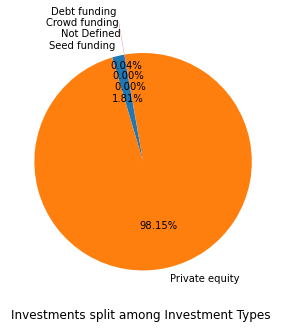

('Private equity', '98.15%')
('Seed funding', '1.81%')
('Debt funding', '0.04%')
('Crowd funding', '0.0%')
('Not Defined', '0.0%')


In [100]:
## Requirements to plot the chart

itype = type_data.index
in1 = data[data['InvestmentType'] == 'Seed funding']
in1 = in1['AmountInUSD'].sum()
in2 = data[data['InvestmentType'] == 'Private equity']
in2 = in2['AmountInUSD'].sum()
in3 = data[data['InvestmentType'] == 'Crowd funding']
in3 = in3['AmountInUSD'].sum()
in4 = data[data['InvestmentType'] == 'Debt funding']
in4 = in4['AmountInUSD'].sum()
in5 = data[data['InvestmentType'] == 'Not Defined']
in5 = in5['AmountInUSD'].sum()
inum = [in1,in2,in3,in4,in5]

##plotting the chart

plt.pie(inum, labels = itype, startangle=100, explode = [0,0,0.2,0.3,0.1], counterclock = True, wedgeprops = {'linewidth':6}, autopct="%0.2f%%") ##use %% aftr f in autopct to converts values in percentage
plt.rcParams['figure.figsize']=(10,5)## change the size opf graph
plt.title("Investments split among Investment Types ",y=-0.1)
plt.show()
ab = data['AmountInUSD'].values
ab = ab.sum()
numpp = []
a =0
for i,b in zip(inum,itype):
    a = (i/ab)*100
    a = round(a,2)
    numpp.append((b,str(a)+"%"))
    
print(numpp[1])
print(numpp[0])
print(numpp[3])
print(numpp[2])
print(numpp[4])   

Problem Statement 5 :
Find top 5 startups with most amount of total funding.
Print the startup name in descending order with respect to amount of funding.
Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.
Output Format :
startup1
startup2
startup3

In [52]:
data5 = data[['StartupName','AmountInUSD']]
data5.loc[data5['StartupName'] == 'Flipkart.com','StartupName'] = 'Flipkart'
data5.loc[data5['StartupName'] == 'Oyo Rooms','StartupName'] = 'Oyo'
data5.loc[data5['StartupName'] == 'OyoRooms','StartupName'] = 'Oyo'
data5.loc[data5['StartupName'] == 'OYOfit','StartupName'] = 'Oyo'
data5.loc[data5['StartupName'] == 'Oyorooms','StartupName'] = 'Oyo'
data5.loc[data5['StartupName'] == 'Paytm Marketplace','StartupName'] = 'Paytm'
data5.loc[data5['StartupName'] == 'Olacabs','StartupName'] = 'Ola Cabs'
data5.loc[data5['StartupName'] == 'Ola','StartupName'] = 'Ola Cabs'
data5.loc[data5['StartupName'] == 'Ola cabs','StartupName'] = 'Ola Cabs'
data10 = data5.groupby('StartupName')['AmountInUSD'].sum()
data10 = data10.sort_values(ascending =False).head(5)
abc = data10.index
print("The top 5 Startups are: ")
for i in abc:
    print(i)



The top 5 Startups are: 
Flipkart
Paytm
Ola Cabs
Snapdeal
Oyo rooms


Problem Statement 6 :
Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
Print the startup name in descending order with respect to the number of funding round as integer value.
Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.
Output Format :
startup1 number1
startup2 number2
startup3 number3

In [53]:
#pd.set_option('display.max_rows', None)
df1 = data5[data5['AmountInUSD']!=0]
df1 = df1['StartupName']
df1 = df1.value_counts()
df1 = df1.head(5)
print("StartupName",' Number of funding')
df1

StartupName  Number of funding


Ola Cabs     8
Swiggy       7
Urbanclap    5
Flipkart     5
Voonik       4
Name: StartupName, dtype: int64

Problem Statement 7 :
Find the Investors who have invested maximum number of times.
Print the investor name and number of times invested as integer value.
Note:
In startup, multiple investors might have invested. So consider each investor for that startup.
Ignore the undisclosed investors.
Output Format :
investorname number

In [59]:
dff = data['InvestorsName'].value_counts()
dff = dff.drop(['Undisclosed Investor','Undisclosed Investors'])
dff = dff.head(5)
print('Investor name','              Number of fundings')
dff

Investor name               Number of fundings


Indian Angel Network        25
Ratan Tata                  24
Group Of Angel Investors    20
Kalaari Capital             16
Sequoia Capital             14
Name: InvestorsName, dtype: int64